In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
fullDF = pd.read_csv('analysis/full-regression.csv', header=0, index_col=0)
splitDF = pd.read_csv('analysis/split-regression.csv', header=[0,1], index_col=0)

# Scatter Plots

In [10]:
splitDF

Parameters                         \
           localDEV Weight Intervention Threshold   
Generation                                          
0                 0.048378               0.227899   
1                 0.029373               0.189318   
2                 0.019260               0.233076   
3                 0.020811               0.247593   
4                 0.031206               0.130307   
...                    ...                    ...   
995               0.021512               0.120176   
996               0.030263               0.239009   
997               0.045920               0.171764   
998               0.016392               0.216144   
999               0.021829               0.129613   

                                                      2010-2016  \
           Probability(Intervention = Success) GlobalDEV Weight   
Generation                                                        
0                                     0.673163         0.178414   
1                                     0.751041         0.121668   
2                                     0.060433         0.087648   
3                                     0.800025         0.093160   
4                                     0.889505         0.129623   
...                                        ...              ...   
995                                   0.941009         0.091420   
996                                   0.483594         0.123780   
997                                   0.848081         0.166665   
998                                   0.109310         0.075608   
999                                   0.002497         0.095831   

                                                   2017-2020                  \
           GlobalDEV Stdev GlobalDEV Pvalue GlobalDEV Weight GlobalDEV Stdev   
Generation                                                                     
0                 0.006071    7.327059e-190         0.182796        0.007043   
1                 0.004056    9.840006e-198         0.141001        0.005087   
2                 0.003224    1.027852e-162         0.091154        0.004329   
3                 0.003609    6.490100e-147         0.117450        0.004484   
4                 0.004127    1.424343e-216         0.149401        0.005326   
...                    ...              ...              ...             ...   
995               0.003623    1.774993e-140         0.122559        0.004655   
996               0.004035    1.252494e-206         0.140777        0.005708   
997               0.005580    4.780718e-196         0.180313        0.006996   
998               0.003147    1.601892e-127         0.074447        0.003632   
999               0.003651    8.225561e-152         0.110596        0.004991   

                             
           GlobalDEV Pvalue  
Generation                   
0             1.637267e-148  
1             4.150689e-169  
2              1.926311e-98  
3             3.141103e-151  
4             4.040165e-173  
...                     ...  
995           9.530155e-153  
996           2.715285e-134  
997           1.764093e-146  
998            2.276419e-93  
999           8.900738e-109  

[1000 rows x 9 columns]

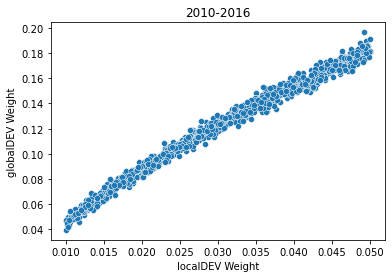

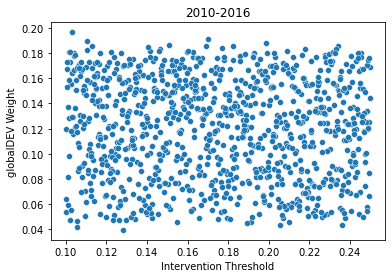

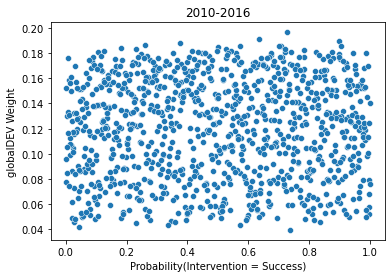

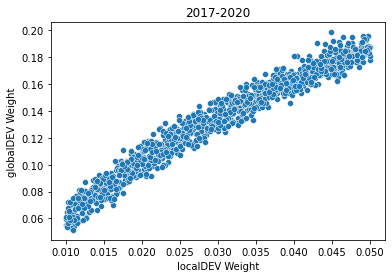

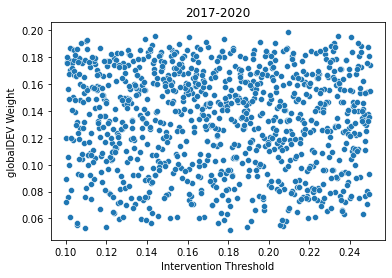

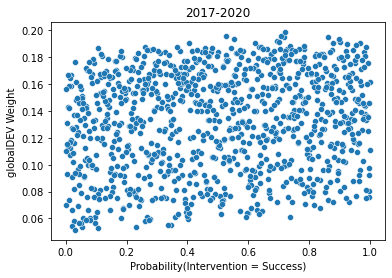

In [27]:
for year in ('2010-2016', '2017-2020'):
    for param in splitDF['Parameters'].columns:
        sns.scatterplot(x=splitDF['Parameters', param], y=splitDF[year, 'GlobalDEV Weight'])
        plt.xlabel(param)
        plt.ylabel('globalDEV Weight')
        plt.title(year)
        plt.savefig(f'figures/scatter—{param}—{year}')
        plt.show()

# Heat Maps

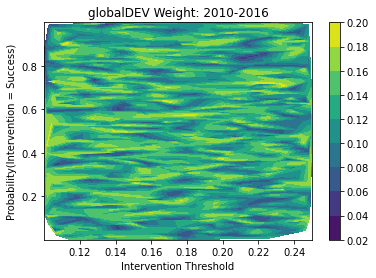

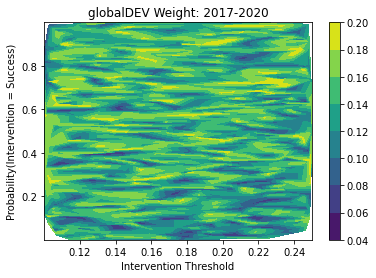

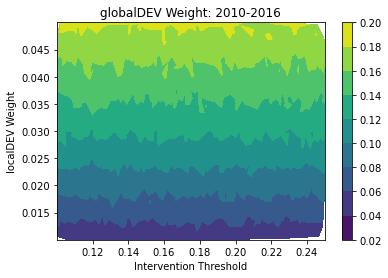

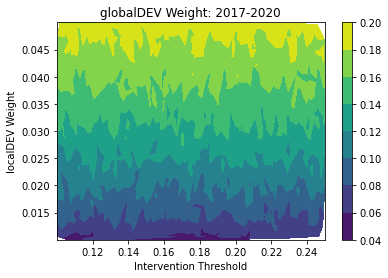

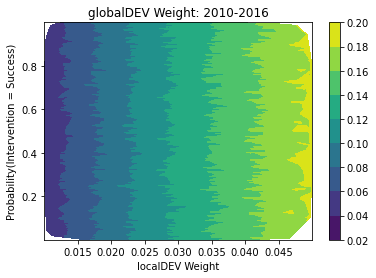

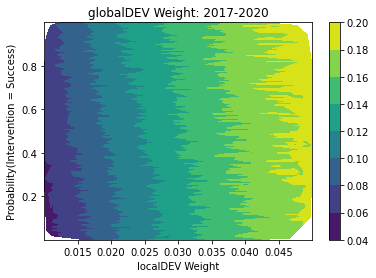

In [22]:
from matplotlib.tri import Triangulation

parameterPairs = [
    ('Intervention Threshold','Probability(Intervention = Success)'),
    ('Intervention Threshold','localDEV Weight'),
    ('localDEV Weight', 'Probability(Intervention = Success)')
]

for combination in parameterPairs:
    p1, p2 = combination
    triang = Triangulation(splitDF['Parameters', p1], splitDF['Parameters', p2]) 
    
    for year in ('2010-2016', '2017-2020'):
        tcf = plt.tricontourf(triang, splitDF[year, 'GlobalDEV Weight'])

        plt.colorbar(tcf) 
        plt.xlabel(p1)
        plt.ylabel(p2)
        plt.title(f'globalDEV Weight: {year}')
        plt.savefig(f'figures/heatmap—{p1} & {p2}—{year}')
        plt.show()

# Histograms

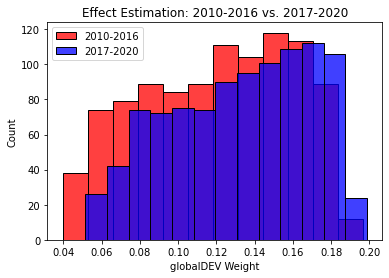

In [29]:
years = ('2010-2016', '2017-2020')
for year,c in zip(years, ('r', 'b')):
    sns.histplot(x=splitDF[year, 'GlobalDEV Weight'], color=c)
plt.legend(years)
plt.xlabel('globalDEV Weight')
plt.title('Effect Estimation: 2010-2016 vs. 2017-2020')
plt.savefig(f'figures/histogram—overlap')

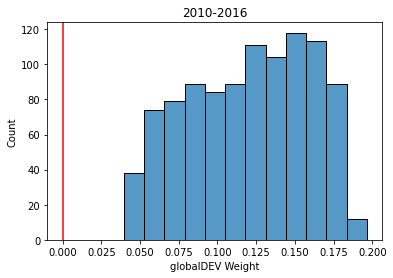

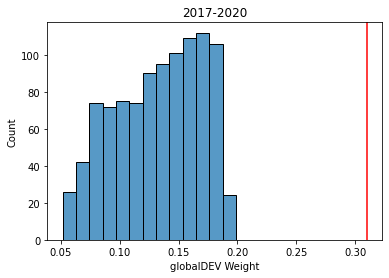

In [26]:
for i, year in enumerate(('2010-2016', '2017-2020')):
    sns.histplot(x=splitDF[year, 'GlobalDEV Weight'])
    if i == 1:
        x_i = 0.31
    else:
        x_i = 0
        
    plt.axvline(x_i, 120, 0, color='r')
    plt.title(year)
    plt.xlabel('globalDEV Weight')
    plt.savefig(f'figures/histogram—{year}')
    plt.show()